In [1]:
import pandas as pd

cols = ['date','time','geolat','geolong',
        'corrected_ram','corrected_cross_track',  
        'geo_east','geo_north',
        'geo_east_cross_track_only','geo_north_cross_track_only']

dataframe = pd.read_csv('F15_15_21.txt',delimiter=' ',names=cols,parse_dates=[['date','time']])
dataframe.plot('date_time',['corrected_cross_track','corrected_ram'])
dataframe.head(3)

,date_time,geolat,geolong,corrected_ram,corrected_cross_track,geo_east,geo_north,geo_east_cross_track_only,geo_north_cross_track_only
0,2015-03-17 15:01:25,27.7591,351.591,-30.39790,-77.4340,-83.1520,-2.40644,-72.8673,26.1987
1,2015-03-17 15:01:33,28.2260,351.458,-16.56430,-76.0488,-77.0998,10.64930,-71.3933,26.1995
2,2015-03-17 15:01:37,28.4593,351.391,-9.64744,-76.4128,-75.0009,17.51720,-71.6472,26.5629


In [2]:
dataframe.set_index(dataframe['date_time'],inplace=True)
dataframe.sort_index(inplace=True)
dataframe.head(3)

,date_time,geolat,geolong,corrected_ram,corrected_cross_track,geo_east,geo_north,geo_east_cross_track_only,geo_north_cross_track_only
date_time,,,,,,,,,
2015-03-17 15:01:25,2015-03-17 15:01:25,27.7591,351.591,-30.39790,-77.4340,-83.1520,-2.40644,-72.8673,26.1987
2015-03-17 15:01:33,2015-03-17 15:01:33,28.2260,351.458,-16.56430,-76.0488,-77.0998,10.64930,-71.3933,26.1995
2015-03-17 15:01:37,2015-03-17 15:01:37,28.4593,351.391,-9.64744,-76.4128,-75.0009,17.51720,-71.6472,26.5629


In [3]:
series = dataframe['geolat'] # or = dataframe.geolat
series_3rows = series[:3]
series_3rows_1min_resampler = series_3rows.resample('1T')
series_3rows_1min_median = series_3rows_1min_resampler.median()
series_3rows_1min_median

date_time
2015-03-17 15:01:00    28.226
Freq: T, Name: geolat, dtype: float64

In [4]:
dataframe['northward_flow']=dataframe['geo_north']>0
dataframe[['geo_north','northward_flow']].head(3)

,geo_north,northward_flow
date_time,,
2015-03-17 15:01:25,-2.40644,False
2015-03-17 15:01:33,10.64930,True
2015-03-17 15:01:37,17.51720,True


In [5]:
import numpy as np
dataframe['flow_direction']=pd.cut(dataframe['geo_north'],[-np.inf,0,np.inf],labels=['southward','northward'])
dataframe[['geo_north','northward_flow','flow_direction']].head(3)

,geo_north,northward_flow,flow_direction
date_time,,,
2015-03-17 15:01:25,-2.40644,False,southward
2015-03-17 15:01:33,10.64930,True,northward
2015-03-17 15:01:37,17.51720,True,northward


In [7]:
dataframe1s = dataframe.resample('1S').nearest()
xt = dataframe1s['corrected_cross_track']
xt.groupby(xt>0).sum()


corrected_cross_track
False   -456149.324002
True     621820.814380
Name: corrected_cross_track, dtype: float64

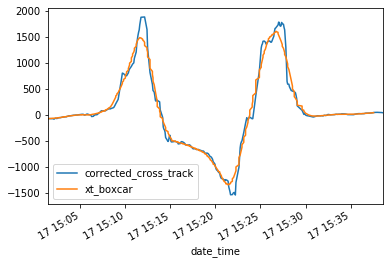

In [45]:
window = '2T'
dataframe4s = dataframe.resample('4S').nearest()
dataframe4s['xt_boxcar']=dataframe4s['corrected_cross_track'].rolling(window=window).mean().shift(-15)
dataframe4s.plot('date_time',['corrected_cross_track','xt_boxcar'])

In [52]:
dataframe1s = dataframe.resample('1S').nearest()
dataframe1s['xt_sign'] = pd.cut(dataframe1s['corrected_cross_track'],
                              [-np.inf,0,np.inf],
                              labels=['negative','positive'])
grouped = dataframe1s.groupby('xt_sign')
grouped[['corrected_cross_track']].sum()

,corrected_cross_track
xt_sign,
negative,-456149.324002
positive,621820.814380


In [9]:
import csv
#Skip the 'date' and 'time' columns because they are combined (date_time) in the dataframe
newcols = ['date_time']
newcols.extend(cols[2:])
newcols.extend('liam_'+col for col in cols if 'geo_' in col)
dataframe.to_csv('F15_15_21_liam.txt',
                 sep=' ',
                 date_format='%m/%d/%YT%H:%M:%S',
                 columns=newcols,
                 header=False,
                 index=False,
                 float_format='%.4f')

/home/liamk/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
